### Detect Outliers - TBC
Find outliers in data - quantity and distribution - use to inform treatment
Z-values, plots etc 

In [8]:
import operator
import math
import random
import pandas as pd
import datetime as dt
import numpy as np
import os
import urllib
import json
import requests
import matplotlib.pyplot as plt
from io import StringIO

from pathlib import Path
from eod import EodHistoricalData
#import pandas_datareader as pdr
#import yfinance as yf
#import talib

from functools import partial

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

pd.set_option('display.max_rows', None)

In [3]:
#paths for data - set prefix to location of Data folder
path_prefix = r'C:\Users\OEM\GDrive\WQU'
path_att = r'\Data\fundamentals_by_attribute'
path_fun = r'\Data\fundamentals_by_ticker'
path_std = r'\Data\standardised_fundamentals'
path_eda = r'\Data\exploratory_data_analysis'
path_rob = r'\Data\robust_scaling'

In [4]:
os.chdir(path_prefix + path_fun)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\OEM\\GDrive\\WQU\\Data\\fundamentals_by_ticker'

In [ ]:
files = [f for f in os.listdir() if os.path.isfile(f)]

In [28]:
df_agg = pd.read_csv("D:\Data\exploratory_data_analysis\df_agg.csv", index_col=0)
df_agg.drop(['prev_close', 'adjusted_close'], axis=1, inplace=True)

In [29]:
dist = df_agg.loc[['min', '25%', '50%', '75%', 'max'], :]

#plt.plot(df_agg[['min', '25%', '50%']])

In [30]:
dist

,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,otherCurrentLiab,commonStock,capitalStock,...,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments
min,3.903881e+10,-7.321339e+08,6.666181e+12,-8.145643e+13,2.363274e+10,6.232819e+09,1.692147e+08,-3.566983e+14,7.458058e+08,2.764122e+10,...,0.0,-9.645876e+09,-2.823055e+09,-5.754758e+10,-5.792737e+09,-1.238136e+12,-2.606488e+08,-2.128681e+10,-8.429414e+09,6.539311e+05
25%,4.476624e+11,5.406688e+09,7.168406e+12,2.383168e+11,3.470913e+11,7.989299e+10,9.017140e+08,-9.481607e+09,1.503532e+10,2.775533e+10,...,0.0,2.207234e+08,2.193295e+10,2.156709e+09,1.105070e+10,-4.015692e+09,-6.619408e+06,1.386041e+08,1.124853e+08,1.032026e+07
50%,9.427444e+11,1.195097e+10,7.731834e+12,4.149759e+11,7.767590e+11,1.386867e+11,2.166196e+09,9.615932e+09,2.345679e+10,2.791565e+10,...,0.0,1.558445e+09,3.874679e+10,9.627396e+09,2.293757e+10,-1.312270e+09,-1.644302e+06,8.517405e+08,4.081227e+08,1.444486e+07
75%,1.317551e+12,2.221676e+10,8.235526e+12,5.409333e+11,1.074785e+12,1.997320e+11,2.999408e+09,3.715486e+10,2.585824e+10,2.810086e+10,...,0.0,2.754226e+09,5.458544e+10,1.467933e+10,9.249251e+10,2.513398e+08,2.736073e+06,5.639752e+09,1.984339e+09,1.870160e+07
max,2.708214e+12,8.922614e+10,8.992345e+12,8.375474e+11,2.268499e+12,6.538215e+11,6.285211e+09,9.174703e+11,2.276884e+11,2.845165e+10,...,0.0,2.100845e+10,1.219972e+11,6.854310e+10,1.097576e+15,2.793723e+10,8.877118e+08,3.309111e+10,1.707348e+10,3.194453e+07


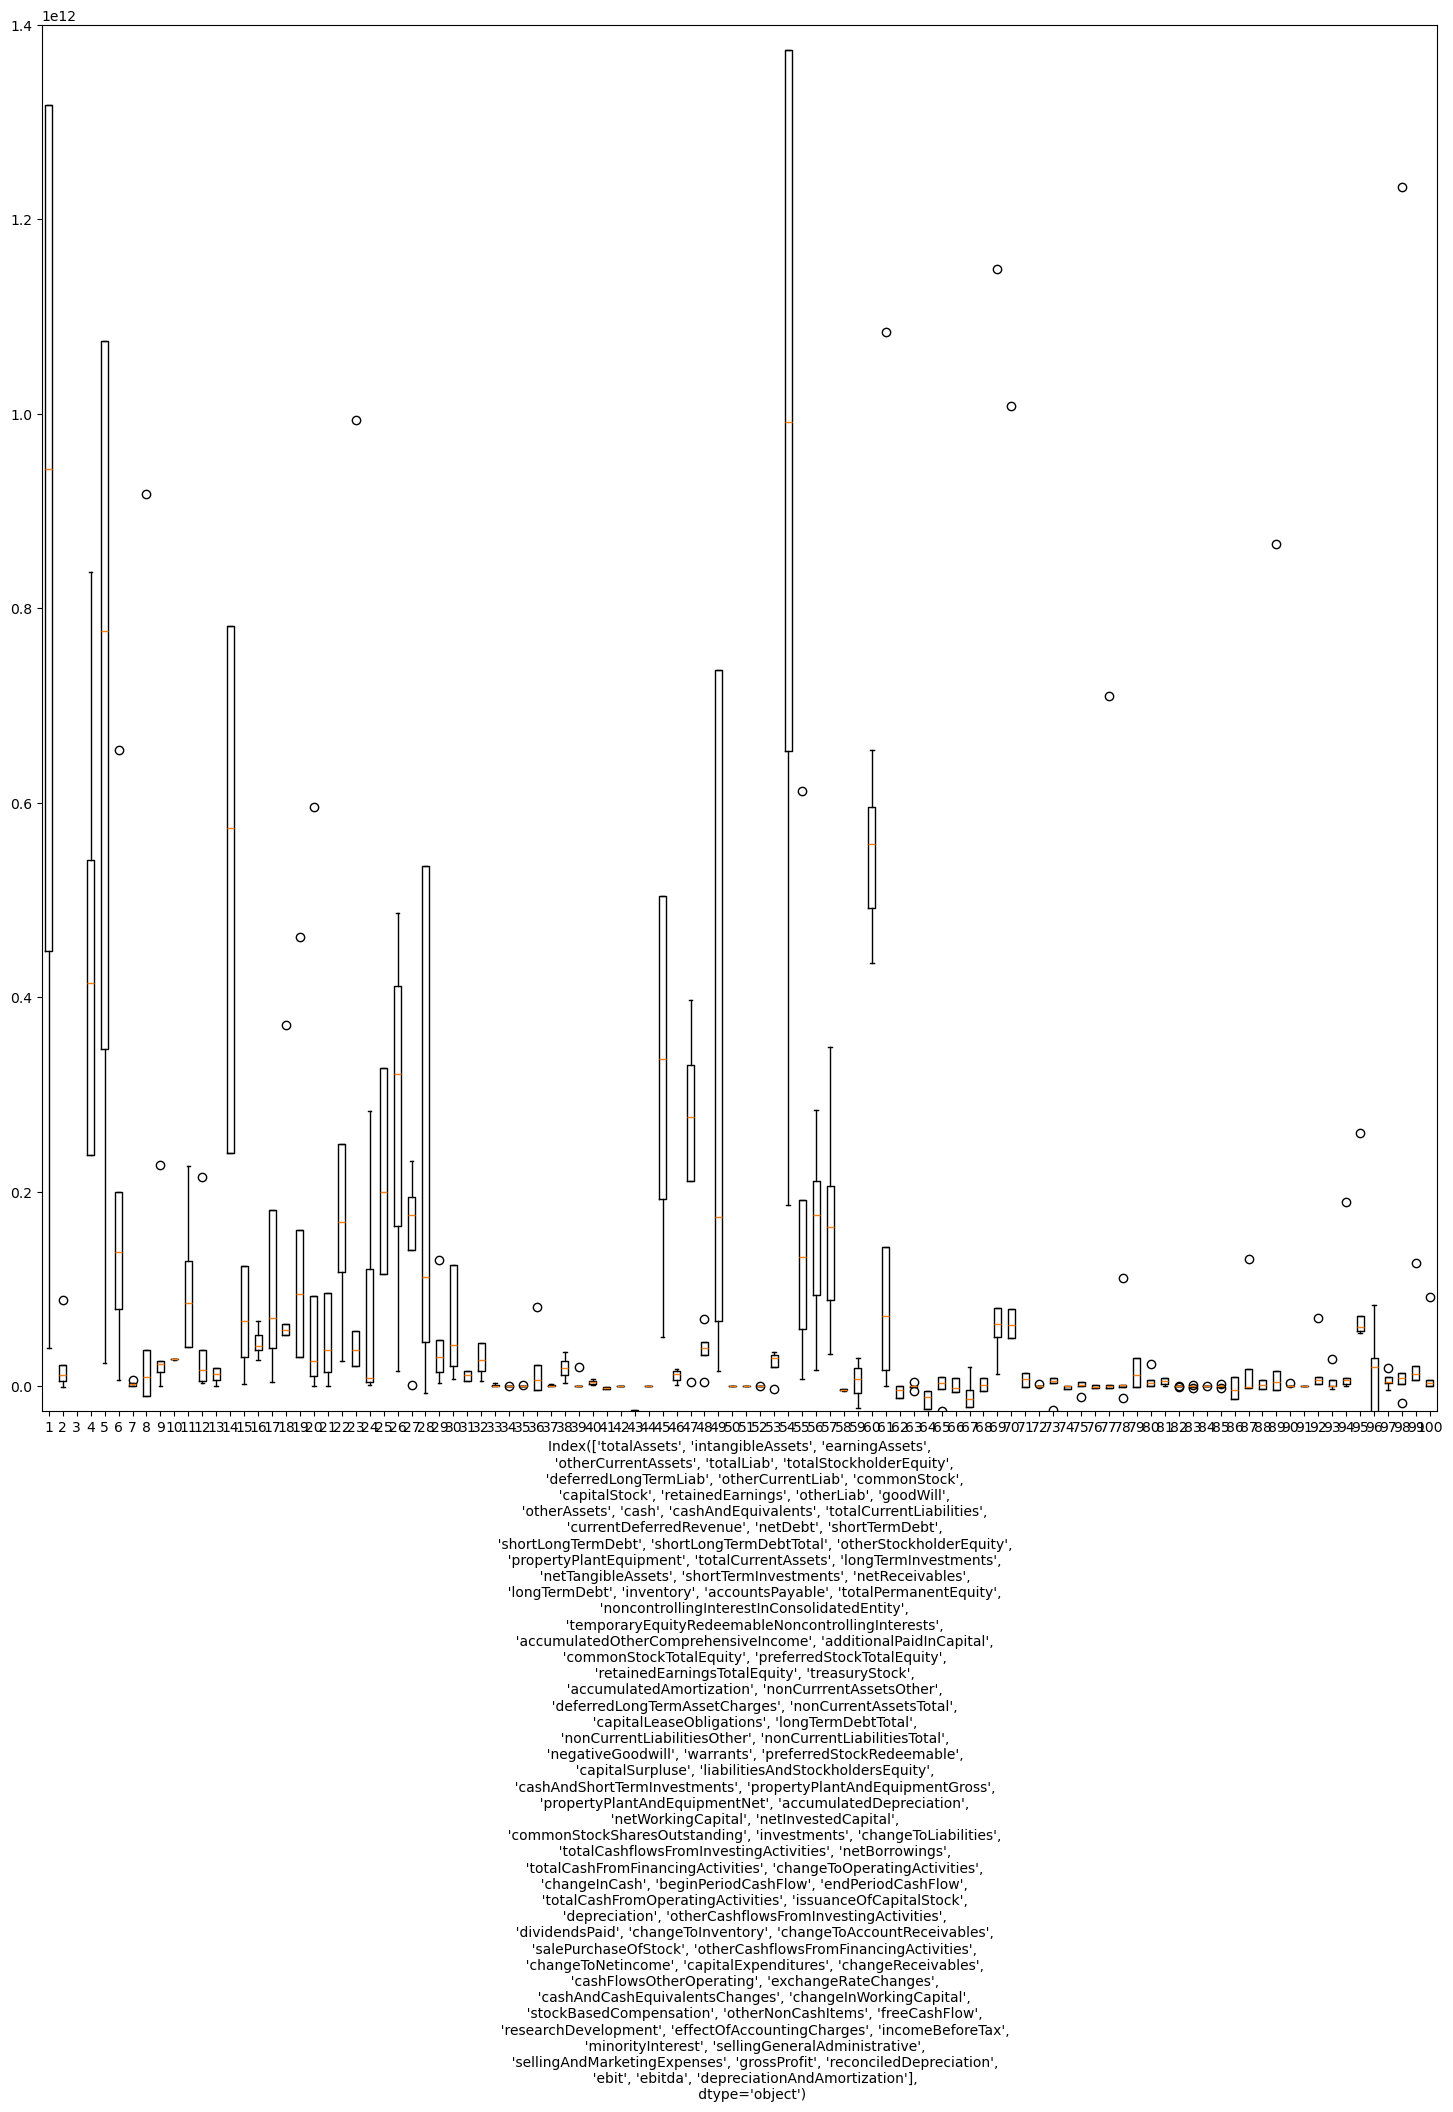

In [57]:
fig, ax = plt.subplots(figsize=(18, 18))
plt.xlabel(dist.columns[:100])
plt.ylim(-25000000000, 1400000000000)
plt.boxplot(dist.iloc[:,:100], )
plt.savefig("boxplots.jpg")